### Numpy array vs Python lists

In [2]:
#speed
#list
a = [i for i in range(10000000)]
b = [i for i in range(10000000,200000000)]

c = []

import time

start = time.time()
for i in range(len(a)):
    c.append(a[i] + b[i])
print(time.time()-start)

4.7999749183654785


In [3]:
#numpy
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)
start = time.time()
c = a+b
print(time.time()-start)


KeyboardInterrupt



In [ ]:
#memory
a = [i for i in range(10000000)]
import sys 

sys.getsizeof(a)

89095160

In [ ]:
a = np.arange(10000000,dtype=np.int32)
sys.getsizeof(a)

40000112

### Advanced Indexing

In [ ]:
a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [ ]:
#Fancy indexing

a[[0,2,3,5]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [ ]:
a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [13]:

import numpy as np 
a = np.arange(24).reshape(6,4)

a[[[0,2,4]],[[1],[2],[3]]]
a[[0,2,3],:]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [22]:
#Boolean indexing
a1 = np.random.randint(1,100,24).reshape(6,4)
a1

array([[86, 80, 15, 25],
       [86, 20, 91, 16],
       [42, 85, 99, 17],
       [73, 51, 13, 71],
       [80, 74, 30, 16],
       [40, 59, 99, 26]], dtype=int32)

In [24]:
#find all numbers greater than 50 
a1 > 50 # comparision each item

a1[a1>50 ]

array([86, 80, 86, 91, 85, 99, 73, 51, 71, 80, 74, 59, 99], dtype=int32)

In [29]:
#find out even numbers
a1[a1 % 2 == 0] 

array([86, 80, 86, 20, 16, 42, 80, 74, 30, 16, 40, 26], dtype=int32)

In [30]:
#find all numbers greater than 50 and are even
a1[(a1>50) & (a1%2==0)]

array([86, 80, 86, 80, 74], dtype=int32)

In [32]:
#find all numbers not divisible by 7
a1[~(a1 %7 == 0)]

array([86, 80, 15, 25, 86, 20, 16, 85, 99, 17, 73, 51, 13, 71, 80, 74, 30,
       16, 40, 59, 99, 26], dtype=int32)

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [33]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [34]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


In [35]:
a = np.arange(12).reshape(4,3)
b = np.arange(3).reshape(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [36]:
a = np.arange(12).reshape(3,4)
b = np.arange(3).reshape(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [39]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [40]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [41]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [42]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

### Working with mathematical formulas

In [44]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [48]:
#sigmoid
def sigmoid(array):
    return 1/(1+np.exp(-(array)))

a = np.arange(10).reshape(5,2)

sigmoid(a)

array([[0.5       , 0.73105858],
       [0.88079708, 0.95257413],
       [0.98201379, 0.99330715],
       [0.99752738, 0.99908895],
       [0.99966465, 0.99987661]])

In [49]:
# mean squared error
actual =  np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

def mse(actual,predicted):
    return np.mean((actual-predicted)**2)

mse(actual,predicted)

np.float64(453.88)

In [ ]:
#binary cross entropy


### Working with missing values

In [50]:
#working wth misiing values -> np.nan

a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [52]:
print(np.isnan(a))
a[~np.isnan(a)]

[False False False False  True False]


array([1., 2., 3., 4., 6.])

### Plotting Graphs

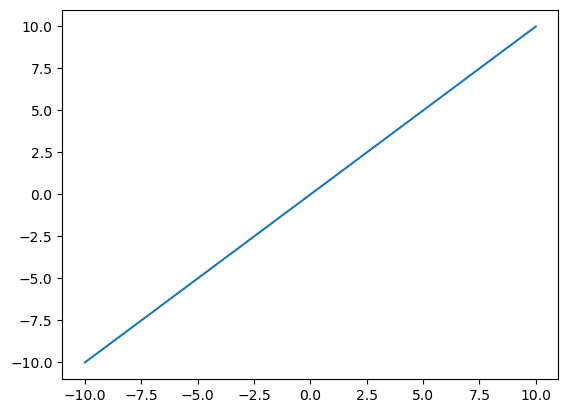

In [59]:
#plotting a 2D plot
#x = y
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = x
dir(plt)
plt.plot(x,y)

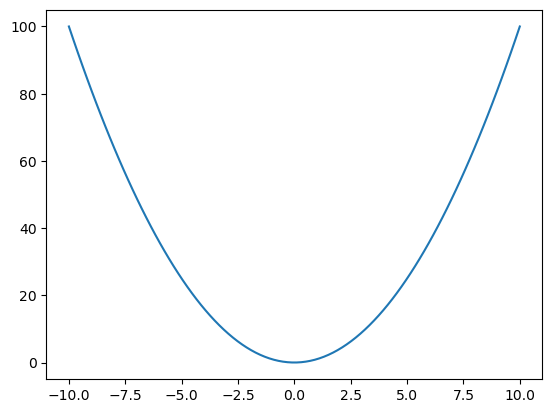

In [60]:
#y=x**2

x = np.linspace(-10,10,100)
y = x**2

plt.plot(x,y)

In [14]:
print("prince")

prince
